## Search by two parameters ##

In [13]:
import os

def search_files_by_keyword(directory, keyword, keyword2, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    # Search for the keyword in each file name
    matching_files = [file 
                      for file in file_names 
                      if (keyword and keyword2) in file and file.endswith(file_format) ] 

    return matching_files

# Example usage
directory_path = '/mnt/d/testdata'
search_keyword = input('enter the search parameter:')
search_keyword2 = input('enter the 2 search parameter:')
desired_format = '.opju'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, search_keyword2, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' the keyword '{search_keyword2} with format '{desired_format}':")
    for file in matching_files:
        print(file)
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")

enter the search parameter: PFD
enter the 2 search parameter: imbibition


Files containing the keyword 'PFD' the keyword 'imbibition with format '.opju':
20231103_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-5M-NaCl_with_gravimetry.opju
20231106_PFD_588_R_10_Carb_1_ZOA_carbonclothXcarboncloth_imbibition_sealed_0-5M-NaCl_with_gravimetry.opju


Roberto.schmidt@posteo.de

## This part is about reading and searching file names with list of keywords ##

In [2]:
import os
import pandas as pd

def search_files_by_keyword(directory, keywords, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    
      
    # Search for the keyword in each file name
    matching_files = [file #return file
                      for file in file_names # listing files in directory
                      if all(keyword in file for keyword in keywords) and file.endswith(file_format) # searching for all keywords
] 

    return matching_files


directory_path = '/mnt/d/testdata'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.txt'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")
    

Tell me search parameters: PFD 615


Files containing the keyword '['PFD', '615']' with format '.txt':
20231103_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-5M-NaCl_with_gravimetry.txt


## This part is about data processing ##

In [44]:
dataset = pd.read_csv(f'/mnt/d/testdata/{file}', delimiter = '\t') #CAUTION! importing data from LAST file!
dataset

,Time (s),WE(1).Current (A),WE(1).Potential (V),WE(1).Charge (C),WE(1).Power (W),Index
0,3.111138,0.000951,-0.017755,0.000000,-1.688926e-05,1
1,5.111138,0.000872,-0.016843,0.001823,-1.469003e-05,2
2,7.111138,0.000817,-0.016217,0.003513,-1.324860e-05,3
3,9.111138,0.000775,-0.015778,0.005105,-1.223476e-05,4
4,11.111138,0.000741,-0.015421,0.006621,-1.142140e-05,5
...,...,...,...,...,...,...
43195,86393.110920,0.000004,-0.046970,0.819110,-1.765804e-07,43196
43196,86395.110920,0.000004,-0.046927,0.819117,-1.764054e-07,43197
43197,86397.110920,0.000004,-0.046918,0.819125,-1.762708e-07,43198
43198,86399.110920,0.000004,-0.046991,0.819132,-1.766033e-07,43199


In [23]:
dataset.columns

Index(['Time (s)', 'WE(1).Current (A)', 'WE(1).Potential (V)',
       'WE(1).Charge (C)', 'WE(1).Power (W)', 'Index'],
      dtype='object')

In [45]:
time_in_min = lambda x: x / 60 #time from seconds to minutes
dataset['Time (s)'] = dataset['Time (s)'].apply(time_in_min)
current_in_mic = lambda x: x * 1000000 # current from A to micA
dataset['WE(1).Current (A)'] = dataset['WE(1).Current (A)'].apply(current_in_mic)
dataset = dataset.drop('Index', axis=1) #removing index column
#changing names
renamed = dataset.rename(columns={"Time (s)": "Time (min)", "WE(1).Current (A)": "Current (micA)", "WE(1).Potential (V)": "Potential (V)", "WE(1).Charge (C)":"Charge (C)", "WE(1).Power (W)":"Power (W)"})
renamed

,Time (min),Current (micA),Potential (V),Charge (C),Power (W)
0,0.051852,951.232910,-0.017755,0.000000,-1.688926e-05
1,0.085186,872.192383,-0.016843,0.001823,-1.469003e-05
2,0.118519,816.955566,-0.016217,0.003513,-1.324860e-05
3,0.151852,775.451660,-0.015778,0.005105,-1.223476e-05
4,0.185186,740.661621,-0.015421,0.006621,-1.142140e-05
...,...,...,...,...,...
43195,1439.885182,3.759460,-0.046970,0.819110,-1.765804e-07
43196,1439.918515,3.759155,-0.046927,0.819117,-1.764054e-07
43197,1439.951849,3.757019,-0.046918,0.819125,-1.762708e-07
43198,1439.985182,3.758240,-0.046991,0.819132,-1.766033e-07


<Axes: xlabel='Time (min)'>

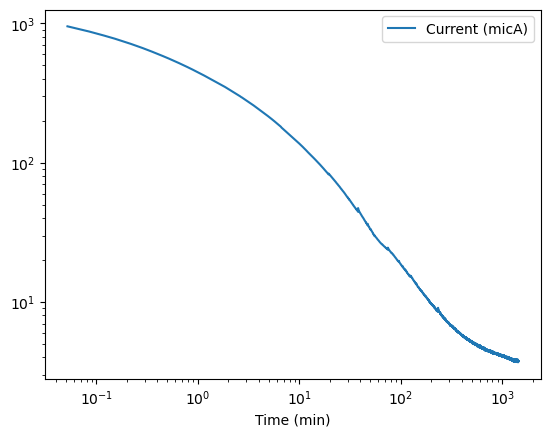

In [48]:
#panda plot in log scale
renamed.plot(kind = "line", x = "Time (min)", y = "Current (micA)", logy = True, logx = True, )
# y = "Current (micA)",